In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pcts = pd.read_csv('./pcts.csv', sep=';', dtype={'pct_200':float, 'pct_500':float, 'pct_800':float, 'pct_1600':float})

In [3]:
pcts

,file name,pct_200,pct_500,pct_800,pct_1600,pct_multilevel_2,pct_multilevel_3,pct_multilevel_4
0,/Users/nicolas/Documents/ime/compmus/mestrado/...,14.830827,23.235294,29.054054,42.592593,"[42.592592592592595, 82.5]","[42.592592592592595, 82.5, 85.80246913580247]","[42.592592592592595, 82.5, 85.80246913580247, ..."
1,/Users/nicolas/Documents/ime/compmus/mestrado/...,14.135338,16.470588,25.675676,42.592593,"[42.592592592592595, 64.13043478260869]","[42.592592592592595, 64.13043478260869, 73.856...","[42.592592592592595, 64.13043478260869, 73.856..."
2,/Users/nicolas/Documents/ime/compmus/mestrado/...,4.774436,9.411765,10.135135,18.518519,"[18.51851851851852, 72.5]","[18.51851851851852, 72.5, 56.86274509803921]","[18.51851851851852, 72.5, 56.86274509803921, 6..."
3,/Users/nicolas/Documents/ime/compmus/mestrado/...,10.902256,17.254902,21.396396,35.185185,"[35.18518518518518, 72.09302325581395]","[35.18518518518518, 72.09302325581395, 71.0743...","[35.18518518518518, 72.09302325581395, 71.0743..."
4,/Users/nicolas/Documents/ime/compmus/mestrado/...,28.928571,34.313725,32.657658,33.333333,"[33.33333333333333, 95.83333333333334]","[33.33333333333333, 95.83333333333334, 100.0]","[33.33333333333333, 95.83333333333334, 100.0, ..."
...,...,...,...,...,...,...,...,...
126,/Users/nicolas/Documents/ime/compmus/mestrado/...,4.680451,10.588235,15.765766,25.925926,"[25.925925925925924, 75.0]","[25.925925925925924, 75.0, 57.14285714285714]","[25.925925925925924, 75.0, 57.14285714285714, ..."
127,/Users/nicolas/Documents/ime/compmus/mestrado/...,51.090226,58.823529,66.666667,66.666667,"[66.66666666666666, 100.0]","[66.66666666666666, 100.0, 88.88888888888889]","[66.66666666666666, 100.0, 88.88888888888889, ..."
128,/Users/nicolas/Documents/ime/compmus/mestrado/...,9.586466,12.549020,17.117117,25.925926,"[25.925925925925924, 69.64285714285714]","[25.925925925925924, 69.64285714285714, 65.048...","[25.925925925925924, 69.64285714285714, 65.048..."
129,/Users/nicolas/Documents/ime/compmus/mestrado/...,24.210526,35.490196,38.963964,43.518519,"[43.51851851851852, 92.37288135593221]","[43.51851851851852, 92.37288135593221, 91.8552...","[43.51851851851852, 92.37288135593221, 91.8552..."


In [22]:
def to_list(list_of_strings):
    return list(map(float, list_of_strings.strip('][').split(', ')))

def treat_pcts(pcts):
    for col in ['pct_multilevel_2', 'pct_multilevel_3', 'pct_multilevel_4']:
        pcts[col] = pcts[col].apply(to_list)
    return pcts

def get_pcts(pcts, file):
    pcts_file = pcts[pcts['file name'] == file).iloc[0]
    return(pcts_file['pct_200'], pcts_file['pct_500'], pcts_file['pct_800'], pcts_file['pct_1600'],
            pcts_file['pct_multilevel_2'], pcts_file['pct_multilevel_3'], pcts_file['pct_multilevel_4'])

SyntaxError: invalid syntax (<ipython-input-22-3383a1bc365b>, line 11)

In [7]:
file_names = []
for year in ['2004']:
	path = '/Users/nicolas/Documents/ime/compmus/mestrado/maestro-dataset/' + year + '/*.wav'
	for file in glob.glob(path):
		file_names.append(file[:-4])

In [5]:
pcts = treat_pcts(pcts)

In [21]:
pcts[pcts['file name'] == file_names[0]].iloc[0]['pct_200']

14.830827067669173

### Tratando resultados FINAIS 

##### Parte 1: Carregando arquivos

In [2]:
results_stft  = pd.read_csv('results_270720_stft_cqt.csv', sep=';')
results_stft2 = pd.read_csv('results_040820_stft_cqt.csv', sep=';')
results_stft  = results_stft.append(results_stft2, ignore_index=True)

results_swgm  = pd.read_csv('results_270720_swgm.csv', sep=';')
results_swgm  = pd.read_csv('results_040820_swgm.csv', sep=';')
results_swgm  = results_swgm.append(results_swgm, ignore_index=True)

results_2014 = pd.read_csv('results_270720_our_sol.csv', sep=';')
results = pd.read_csv('results_040820_our_sol.csv', sep=';')
results = results_2014.append(results, ignore_index=True)


In [3]:
all_results = results.append(results_swgm, ignore_index=True)
all_results = all_results.append(results_stft, ignore_index=True)
all_results = all_results.rename(columns={'timeit':'time (s)'})

In [4]:
all_results

,file name,representation,max res,time (s),pct refine
0,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 200,512,1.838559,14.830827067669173
1,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 500,512,0.820536,23.235294117647058
2,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 800,512,0.606884,29.05405405405405
3,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 1600,512,0.287977,42.5925925925926
4,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 2 lvl,512,0.518072,"[42.592592592592595, 82.5]"
...,...,...,...,...,...
220231,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,8192,0.574394,NaN
220232,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,STFT,16384,0.015786,NaN
220233,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,16384,0.667016,NaN
220234,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,STFT,32768,0.025516,NaN


agora: pegar média por arquivo (o experimento é repetido 5x por arquivo)

In [5]:
res = all_results.groupby(['file name', 'representation', 'max res'], as_index=False).mean()

In [6]:
res

,file name,representation,max res,time (s)
0,/Users/nicolas/Documents/ime/compmus/mestrado/...,CQT,512,0.517244
1,/Users/nicolas/Documents/ime/compmus/mestrado/...,CQT,1024,0.520472
2,/Users/nicolas/Documents/ime/compmus/mestrado/...,CQT,2048,0.514935
3,/Users/nicolas/Documents/ime/compmus/mestrado/...,CQT,4096,0.533860
4,/Users/nicolas/Documents/ime/compmus/mestrado/...,CQT,8192,0.571414
...,...,...,...,...
71612,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,2048,0.591432
71613,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,4096,0.592919
71614,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,8192,0.589649
71615,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,16384,0.585495


In [67]:
our_16 = res[res['representation'] == 'economic 1600']
our_16 = our_16.groupby(['max res']).mean()

our_8 = res[res['representation'] == 'economic 800']
our_8 = our_8.groupby(['max res']).mean()

our_5 = res[res['representation'] == 'economic 500']
our_5 = our_5.groupby(['max res']).mean()

our_2 = res[res['representation'] == 'economic 200']
our_2 = our_2.groupby(['max res']).mean()

our_2lvl = res[res['representation'] == 'economic 2 lvl']
our_2lvl = our_2lvl.groupby(['max res']).mean()

our_3lvl = res[res['representation'] == 'economic 3 lvl']
our_3lvl = our_3lvl.groupby(['max res']).mean()

our_4lvl = res[res['representation'] == 'economic 4 lvl']
our_4lvl = our_4lvl.groupby(['max res']).mean()

In [8]:
stft = res[res['representation'] == 'STFT']
stft = stft.groupby(['max res']).mean()

cqt = res[res['representation'] == 'CQT']
cqt = cqt.groupby(['max res']).mean()

swgm = res[res['representation'] == 'SWGM']
swgm = swgm.groupby(['max res']).mean()

In [24]:
all_results_costly = pd.read_csv('./results_pilot/all_results_costly_treated.csv')
lt = all_results_costly[all_results_costly['representation'] == 'LT']['time (s)'].to_numpy()
sls = all_results_costly[all_results_costly['representation'] == 'SLS']['time (s)'].to_numpy()

In [25]:
resolutions

[512, 1024, 2048, 4096, 8192, 16384, 32768]

In [26]:
lt

array([  82.,  179.,  375.,  766., 1540., 3073.])

In [28]:
# Interpolando ultimo ponto p/ lt e sls

lt_forecast = [lt[-1], lt[-1] + ((lt[-1] - lt [-2]) / (16384-8192)) * 16384]
sls_forecast = [sls[-1], sls[-1] + ((sls[-1] - sls [-2]) / (16384-8192)) * 16384]

##### Parte 2: Gráficos

In [ ]:
resolutions = [512,1024,2048,4096,8192,16384,32768]

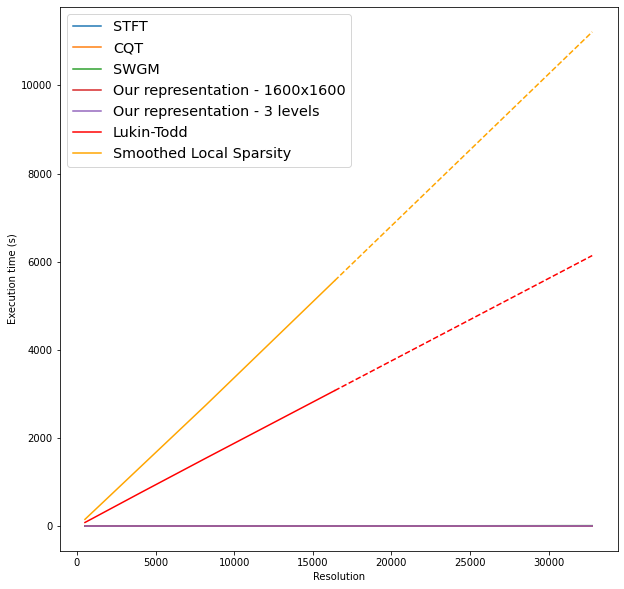

In [80]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, stft, label='STFT')
plt.plot(resolutions, cqt, label='CQT')
plt.plot(resolutions, swgm, label='SWGM')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, our_3lvl, label='Our representation - 3 levels')
plt.plot(resolutions[:-1], lt, label='Lukin-Todd', color='red')
plt.plot(resolutions[-2:], lt_forecast, '--', color='red')
plt.plot(resolutions[:-1], sls, label='Smoothed Local Sparsity', color='orange')
plt.plot(resolutions[-2:], sls_forecast, '--', color='orange')


plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large')

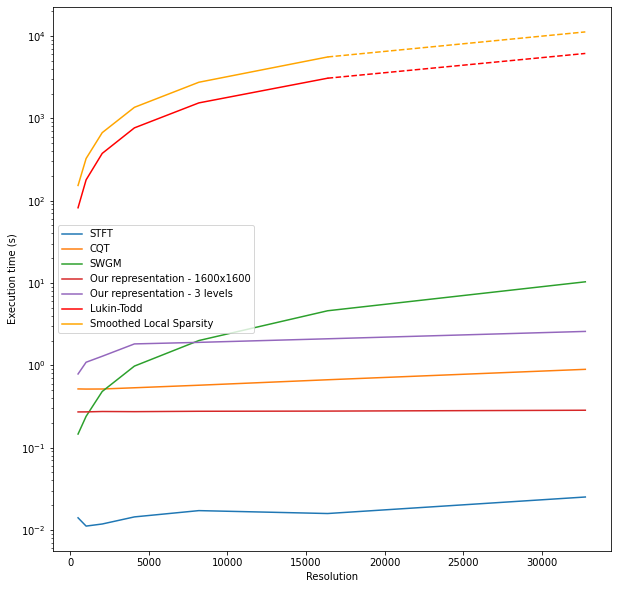

In [68]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, stft, label='STFT')
plt.plot(resolutions, cqt, label='CQT')
plt.plot(resolutions, swgm, label='SWGM')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, our_3lvl, label='Our representation - 3 levels')
plt.plot(resolutions[:-1], lt, label='Lukin-Todd', color='red')
plt.plot(resolutions[-2:], lt_forecast, '--', color='red')
plt.plot(resolutions[:-1], sls, label='Smoothed Local Sparsity', color='orange')
plt.plot(resolutions[-2:], sls_forecast, '--', color='orange')


plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')
plt.yscale('log')

plt.legend(fontsize='medium', loc=0)

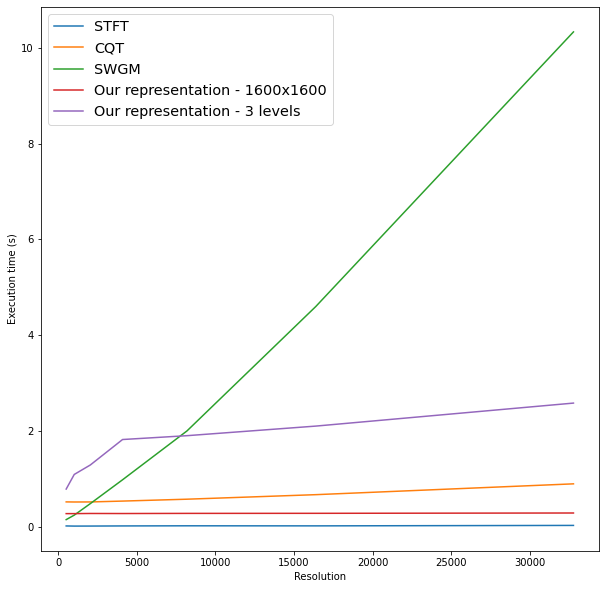

In [81]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, stft, label='STFT')
plt.plot(resolutions, cqt, label='CQT')
plt.plot(resolutions, swgm, label='SWGM')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, our_3lvl, label='Our representation - 3 levels')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large', loc=0)

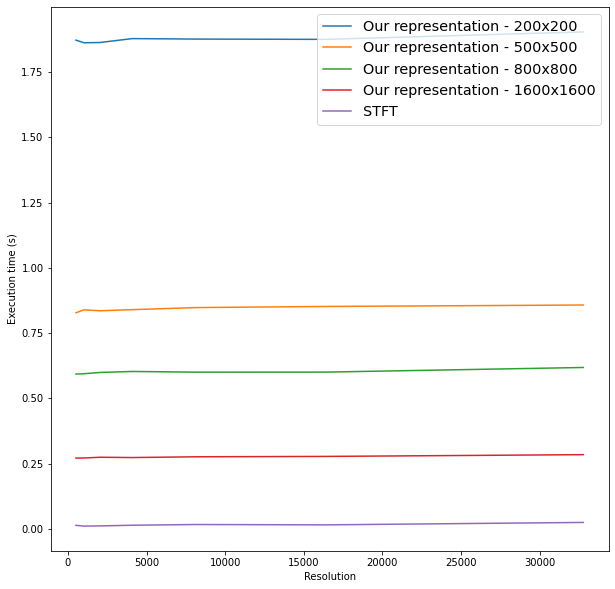

In [73]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2, label='Our representation - 200x200')
plt.plot(resolutions, our_5, label='Our representation - 500x500')
plt.plot(resolutions, our_8, label='Our representation - 800x800')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, stft, label='STFT')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large')

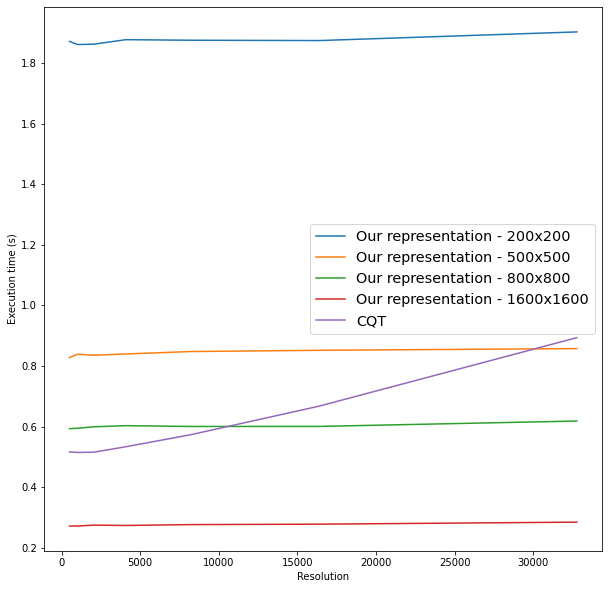

In [77]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2, label='Our representation - 200x200')
plt.plot(resolutions, our_5, label='Our representation - 500x500')
plt.plot(resolutions, our_8, label='Our representation - 800x800')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, cqt, label='CQT')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large')

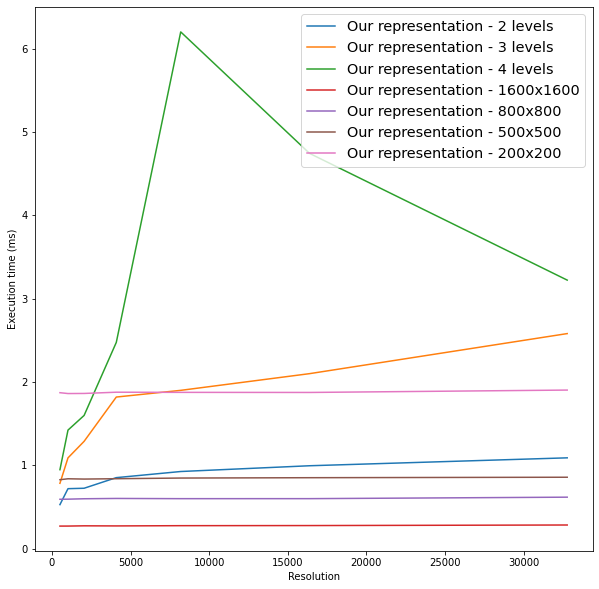

In [78]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2lvl, label='Our representation - 2 levels')
plt.plot(resolutions, our_3lvl, label='Our representation - 3 levels')
plt.plot(resolutions, our_4lvl, label='Our representation - 4 levels')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, our_8, label='Our representation - 800x800')
plt.plot(resolutions, our_5, label='Our representation - 500x500')
plt.plot(resolutions, our_2, label='Our representation - 200x200')

plt.xlabel('Resolution')
plt.ylabel('Execution time (ms)')

plt.legend(fontsize='x-large')

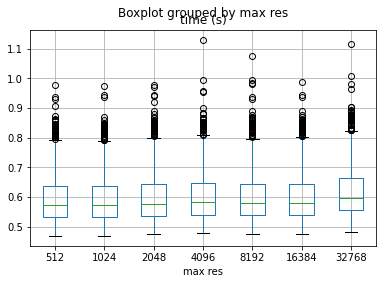

In [79]:
our_8 = res[res['representation'] == 'economic 800']
our_8.boxplot(column='time (s)', by='max res')

In [73]:
results.head()

,file name,representation,max res,time (s),pct refine
0,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 200,512,1.718975,9.078947368421053
1,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 500,512,0.794866,17.549019607843135
2,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,512,0.570447,22.97297297297297
3,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 1600,512,0.268805,38.888888888888886
4,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 200,1024,1.657826,9.078947368421053


In [78]:
pcts = results.drop(['time (s)'], axis=1)

In [90]:
reps = ['economic 200', 'economic 500', 'economic 800', 'economic 1600']
pcts = pcts.query("representation in ['economic 200', 'economic 500', 'economic 800', 'economic 1600']")
pcts['pct refine'].astype(float)

In [104]:
np.sqrt(pcts.groupby('representation').var()['pct refine'])

representation
economic 1600    11.358581
economic 200      7.819878
economic 500      9.359160
economic 800      9.881432
Name: pct refine, dtype: float64

In [35]:
results = pd.read_csv('results_new_180720.csv', sep=';')
# results.columns = ['file name', 'representation', 'timeit']
# results['time (ms)'] = results['timeit'].apply(get_time)
# results['std dev (ms)'] = results['timeit'].apply(get_std_dev)
# return results.drop(['timeit'], axis=1)

#### ler csv, formatar dados, passar todos os tempos pra ms, fazer boxplots

In [36]:
def get_time(timeit):
    mean = timeit.split(' ')[0]
    unit = timeit.split(' ')[1]
    if unit == 's':
         return float(mean)*1000
    return float(mean)

def get_std_dev(timeit):
    std_dev = timeit.split(' ')[3]
    unit = timeit.split(' ')[4]
    if unit == 'µs':
         return float(std_dev)/1000
    return float(std_dev)

def get_time_costly(timeit):
    time_in_sec = 0
    time = timeit.split('±')[0]
    for unit in time.split(' '):
        if unit == '':
            continue
        if unit[-1] == 'h':
            time_in_sec += float(unit[:-1]) * 60 * 60
        elif unit[-1] == 'n':
            time_in_sec += float(unit[:-3]) * 60
        elif unit[-1] == 's':
            time_in_sec += float(unit[:-1])
    return time_in_sec

In [37]:
def treat_results(file_name):
    results = pd.read_csv(file_name, sep=';')
    results['time (ms)'] = results['timeit'].apply(get_time)
    results['std dev (ms)'] = results['timeit'].apply(get_std_dev)
    return results.drop(['timeit'], axis=1)

def treat_results_costly(file_name):
    results = pd.read_csv(file_name, sep=';', header=None)
    results.columns = ['file name', 'representation', 'timeit']
    results['time (s)'] = results['timeit'].apply(get_time_costly)
    return results.drop(['timeit'], axis=1)

In [6]:
results = treat_results('./results_new_180720.csv')

In [39]:
# all_results_costly = pd.DataFrame(columns=['file name', 'representation', 'resolution', 'time (s)'])

# for res in [512, 1024, 2048, 4096, 8192, 16384]:
#     file = './results_pilot/all_results_costly_treated.csv''
#     file = 'results_costly' + str(res) + '.csv'
#     results = treat_results_costly(file)
#     results['resolution'] = res
#     all_results_costly = all_results_costly.append(results)

In [62]:
all_results_costly = pd.read_csv('./results_pilot/all_results_costly_treated.csv')

Groupby representation and make boxplots

In [8]:
cqt = results[results['representation'] == 'CQT']
cqt = cqt.drop('std dev (ms)', axis=1)

In [11]:
cqt.head()

,file name,representation,max res,n_fft,pct refine,time (ms)
1,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,512,NaN,NaN,582.0
10,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,1024,NaN,NaN,532.0
19,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,2048,NaN,NaN,564.0
28,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,4096,NaN,NaN,558.0
37,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,8192,NaN,NaN,589.0


<Figure size 720x720 with 0 Axes>

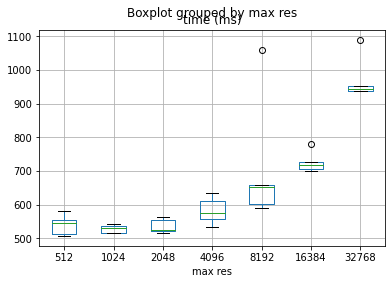

In [12]:
plt.figure(figsize=[10,10])
cqt.boxplot(column='time (ms)', by='max res')

In [87]:
our = results[results['representation'] == 'economic 800']
our = our.drop('std dev (ms)', axis=1)

<Figure size 720x720 with 0 Axes>

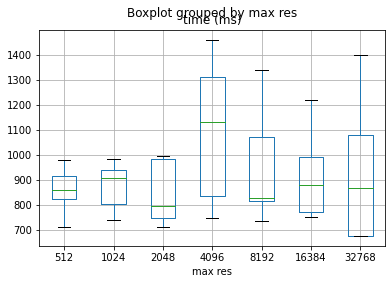

In [88]:
plt.figure(figsize=[10,10])
our.boxplot(column='time (ms)', by='max res')

In [13]:
our = all_results[all_results['representation'] == 'economic 500']
our = our.drop('std dev (ms)', axis=1)

swgm = all_results[all_results['representation'] == 'SWGM']
swgm = swgm.drop('std dev (ms)', axis=1)

stft = all_results[all_results['representation'] == 'STFT']
stft = stft.drop('std dev (ms)', axis=1)

cqt = all_results[all_results['representation'] == 'CQT']
cqt = cqt.drop('std dev (ms)', axis=1)

/Users/nicolas/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/Users/nicolas/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/Users/nicolas/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_matplotlib/boxplot.py:375: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


<Figure size 720x720 with 0 Axes>

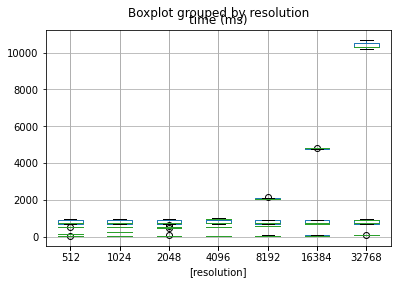

In [14]:
plt.figure(figsize=[10,10])
ax = swgm.boxplot(by='resolution', return_type='axes')
ax = our.boxplot(by='resolution', ax=ax)
ax = cqt.boxplot(by='resolution', ax=ax)
ax = stft.boxplot(by='resolution', ax=ax)

In [32]:
our = results[results['representation'] == 'economic 800']
our = our.drop(['std dev (ms)', 'n_fft'], axis=1)
our = our.groupby(['max res']).mean()

swgm = results[results['representation'] == 'SWGM']
swgm = swgm.drop(['std dev (ms)', 'n_fft'], axis=1)
swgm = swgm.groupby(['max res']).mean()

stft = results[results['representation'] == 'STFT']
stft = stft.drop(['std dev (ms)', 'n_fft'], axis=1)
stft = stft.groupby(['max res']).mean()

cqt = results[results['representation'] == 'CQT']
cqt = cqt.drop(['std dev (ms)', 'n_fft'], axis=1)
cqt = cqt.groupby(['max res']).mean()

In [33]:
resolutions = [512, 1024, 2048, 4096, 8192, 16384, 32768]

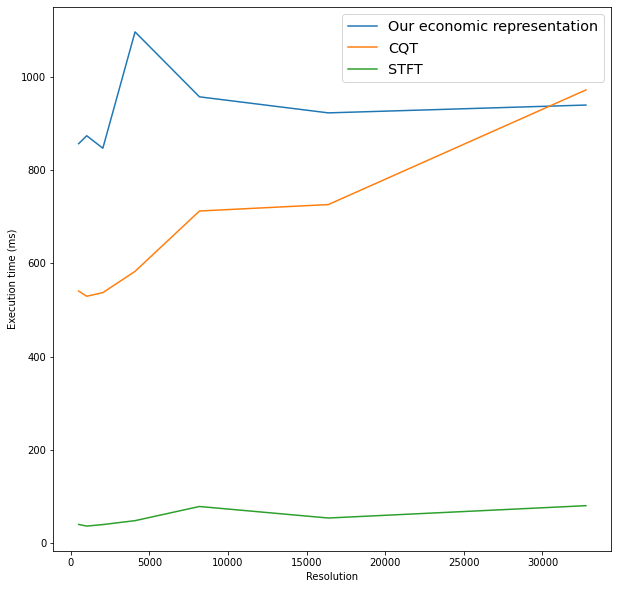

In [34]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our, label='Our economic representation')
plt.plot(resolutions, cqt, label='CQT')
# plt.plot(resolutions, swgm, label='SWGM')
plt.plot(resolutions, stft, label='STFT')

plt.xlabel('Resolution')
plt.ylabel('Execution time (ms)')

plt.legend(fontsize='x-large')

In [72]:
our_8 = results[results['representation'] == 'economic 800']
our_8 = our_8.drop(['std dev (ms)', 'n_fft'], axis=1)
our_8 = our_8.groupby(['max res']).mean()

our_5 = results[results['representation'] == 'economic 500']
our_5 = our_5.drop(['std dev (ms)', 'n_fft'], axis=1)
our_5 = our_5.groupby(['max res']).mean()

our_2 = results[results['representation'] == 'economic 200']
our_2 = our_2.drop(['std dev (ms)', 'n_fft'], axis=1)
our_2 = our_2.groupby(['max res']).mean()

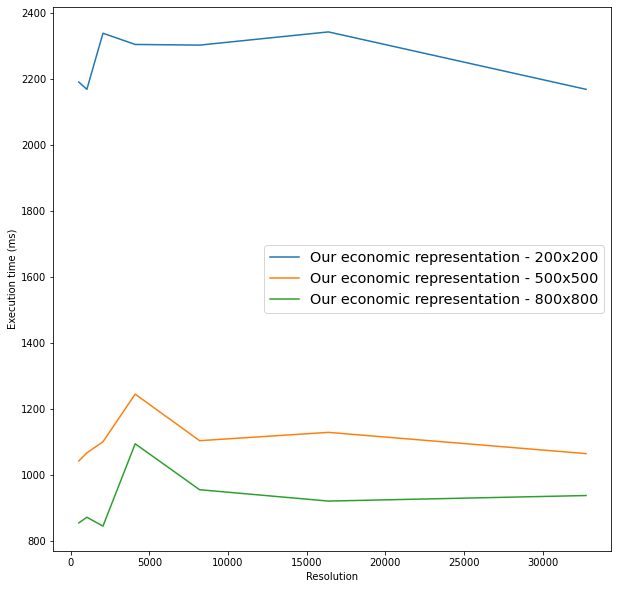

In [47]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2, label='Our economic representation - 200x200')
plt.plot(resolutions, our_5, label='Our economic representation - 500x500')
plt.plot(resolutions, our_8, label='Our economic representation - 800x800')

plt.xlabel('Resolution')
plt.ylabel('Execution time (ms)')

plt.legend(fontsize='x-large')

In [51]:
our_2lvl = results[results['representation'] == 'economic 2 lvl']
our_2lvl = our_2lvl.drop(['std dev (ms)', 'n_fft'], axis=1)
our_2lvl = our_2lvl.groupby(['max res']).mean()

our_3lvl = results[results['representation'] == 'economic 3 lvl']
our_3lvl = our_3lvl.drop(['std dev (ms)', 'n_fft'], axis=1)
our_3lvl = our_3lvl.groupby(['max res']).mean()

our_4lvl = results[results['representation'] == 'economic 4 lvl']
our_4lvl = our_4lvl.drop(['std dev (ms)', 'n_fft'], axis=1)
our_4lvl = our_4lvl.groupby(['max res']).mean()

In [89]:
441000/512

861.328125

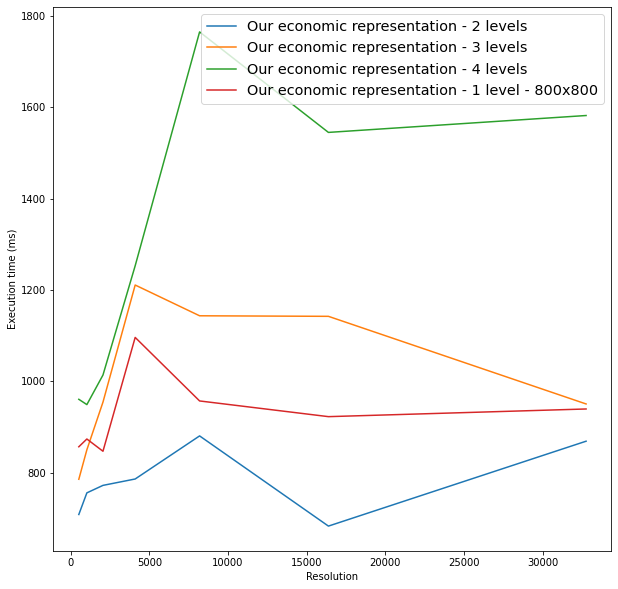

In [53]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2lvl, label='Our economic representation - 2 levels')
plt.plot(resolutions, our_3lvl, label='Our economic representation - 3 levels')
plt.plot(resolutions, our_4lvl, label='Our economic representation - 4 levels')
plt.plot(resolutions, our_8, label='Our economic representation - 1 level - 800x800')


plt.xlabel('Resolution')
plt.ylabel('Execution time (ms)')

plt.legend(fontsize='x-large')

In [64]:
resolutions = resolutions[:-1]
lt = all_results_costly[all_results_costly['representation'] == 'LT']['time (s)']
sls = all_results_costly[all_results_costly['representation'] == 'SLS']['time (s)']

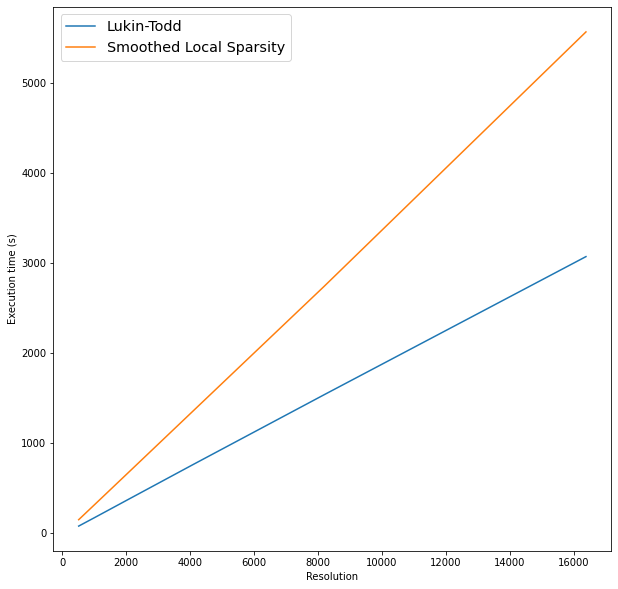

In [65]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, lt, label='Lukin-Todd')
plt.plot(resolutions, sls, label='Smoothed Local Sparsity')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')

plt.legend(fontsize='x-large')

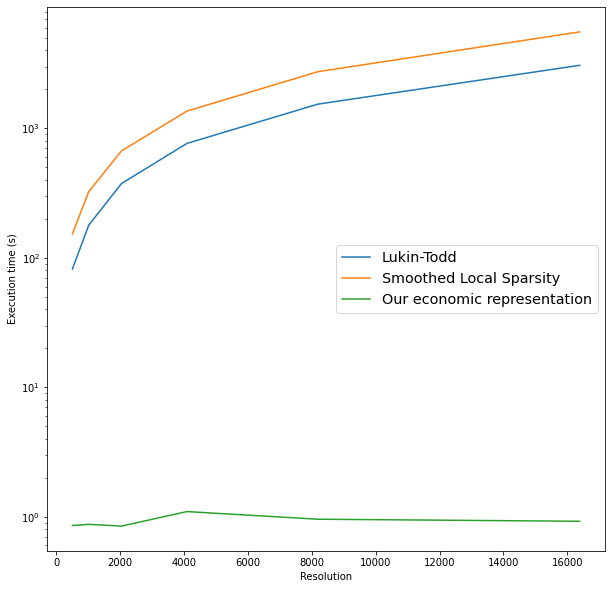

In [76]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, lt, label='Lukin-Todd')
plt.plot(resolutions, sls, label='Smoothed Local Sparsity')
plt.plot(resolutions, our_8[:-1] / 1000, label='Our economic representation')

plt.xlabel('Resolution')
plt.ylabel('Execution time (s)')
plt.yscale('log')

plt.legend(fontsize='x-large')

checar pct pra nossa representação "estressada"

In [54]:
results.head()

,file name,representation,max res,n_fft,pct refine,time (ms),std dev (ms)
0,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,STFT,512,NaN,NaN,38.7,0.545
1,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,CQT,512,NaN,NaN,582.0,108.000
2,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,SWGM,512,NaN,NaN,122.0,4.050
3,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 200,512,512.0,10.508149568552252,2110.0,298.000
4,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 500,512,512.0,19.50980392156863,1060.0,133.000


In [77]:
our_8 = results[results['representation'] == 'economic 800']

In [78]:
our_8[pct]

,file name,representation,max res,n_fft,pct refine,time (ms),std dev (ms)
5,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,512,512.0,24.54954954954955,859.0,39.90
14,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,1024,512.0,24.54954954954955,908.0,22.90
23,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,2048,512.0,24.54954954954955,795.0,7.00
32,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,4096,512.0,24.54954954954955,1310.0,148.00
41,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,8192,512.0,24.54954954954955,813.0,24.90
50,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,16384,512.0,24.54954954954955,878.0,40.20
59,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,32768,512.0,24.54954954954955,1400.0,330.00
68,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,512,512.0,16.666666666666664,709.0,6.82
77,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,1024,512.0,16.666666666666664,803.0,8.82
86,/Volumes/HD-NICO/vaio-backup/Documents/ime/com...,economic 800,2048,512.0,16.666666666666664,747.0,56.40


In [59]:
our_8['pct refine'].max()

'36.93693693693694'